In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Harshita\Desktop\kc_house_data.csv')

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df1 = df['floors'].to_frame()
df1.value_counts()

floors
1.0       10680
2.0        8241
1.5        1910
3.0         613
2.5         161
3.5           8
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='waterfront', ylabel='price'>

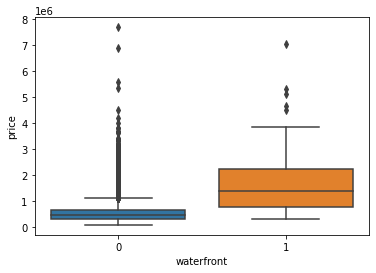

In [8]:
sns.boxplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

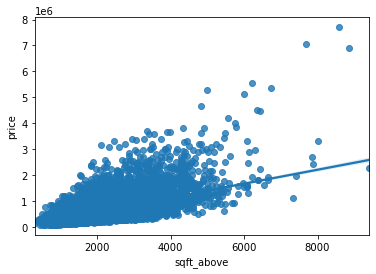

In [10]:
sns.regplot(x=df['sqft_above'], y=df['price'])

In [13]:
l = np.random.rand(len(df))<0.8
train = df[l]
test = df[~l]

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = train[['sqft_living']].values
train_y = train[['price']].values
test_x = test[['sqft_living']].values
test_y = test[['price']].values

regr.fit(train_x, train_y)

y_pred = regr.predict(test_x)

from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.4881137856927995

In [17]:
l1 = np.random.rand(len(df))<0.8
train1 = df[l1]
test1 = df[~l1]

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x1 = train[["floors","waterfront","lat","bedrooms","sqft_basement",
                  "view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]].values
train_y1 = train[['price']].values
test_x1 = test[["floors","waterfront","lat","bedrooms","sqft_basement",
                "view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]].values
test_y1 = test[['price']].values

regr.fit(train_x1, train_y1)

#print(regr.coef_)
#print(regr.intercept_)

y_pred1 = regr.predict(test_x1)

from sklearn.metrics import r2_score
r2_score(test_y1, y_pred1)

0.6523062730014132

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

Input = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(degree=2)), ('mode',LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(train_x1, train_y1)

yhat = pipe.predict(test_x1)

r2_score(test_y1, yhat)

0.7177048232002483

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

RidgeModel = Ridge(alpha = 0.1)

RidgeModel.fit(train_x1, train_y1)

yhat1 = RidgeModel.predict(test_x1)
r2_score(test_y1, yhat1)

0.6522507029935092

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

Input = [('scale',StandardScaler()), ('polinomial',PolynomialFeatures(degree=2)), ('mode',Ridge(alpha = 0.1))]

pipe = Pipeline(Input)

pipe.fit(train_x1, train_y1)

yhat = pipe.predict(test_x1)

r2_score(test_y1, yhat)

0.7175529922420417